# 1. 순환 신경망
<br><br>
### 1) 개념
신경망이 단어의 관계를 더 잘 포착하려면 현재 단어 이전에 출현한 단어를 기억할 수 있어야 한다. 그런 능력이 있다면 토큰들의 출현 순서에 존재하는 어떤 패턴을 포착할 수 있다. 다행히 순환 신경망이 문장의 이전 단어들을 기억하는 능력이 있다. 다음 그림은 순환 신경망의 예이다. 은닉층은 순환 뉴런 하나로 구성되어 있다. 이 뉴런을 순환 뉴런이라고 부르는 것은, 뉴런의 출력이 자기 자신으로 다시 입력되기 때문이다. 즉, **한 시간 단계 t에서의 은닉층(은닉층t)의 출력이 은닉층 t+1의 입력에 추가되고, 은닉층 t+1의 출력은 다시 은닉층 t+2의 입력에 추가된다.** 오른쪽 그림이 순환신경망을 t=2까지 펼친 모습이다. 오른쪽으로 갈수록 미래이고 왼쪽으로 갈수록 과거이다. **은닉층 t의 출력이 은닉층 t+1에 새 토큰(입력층에서 온)과 함께 입력된다.** 

<img src="./image/순환신경망.jpg" width="400" height="200">


이제 자료의 관점에서 순환신경망을 살펴보자. 각 문서를 토큰화하고 각 토큰의 단어 벡터를 생성하는 것은 합성곱 신경망과 같다. 합성곱 신경망에서는 하나의 문서를 구성하는 토큰(단어 벡터의 형태)들을 통째로 신경망에 입력했지만, **순환 신경망에서는 토큰들을 차례로 하나씩 입력한다.** 순환 신경망에서는 먼저 첫 토큰의 단어 벡터를 입력해서 출력을 얻는다. 그런 다음 둘째 토큰을 입력하되, 첫 토큰에 대한 출력도 함께 입력한다! 마찬가지로 셋째 토큰을 입력할 때는 둘째 토큰에 대한 출력을 함께 넣는다. 이런 과정을 반복함에 따라 신경망은 '시간'에 근거한 개념을 어느 정도 포착하게 된다. 


<img src="./image/합성곱신경망.jpg" width="500" height="200">
<img src="./image/순환신경망2.jpg" width="500" height="200">


## 2) 시간에 대한 역전파
<br><br>
순환 신경망에는 입력 견본 하나가 통째로 입력되는 것이 아니라 한 견본의 토큰들이 차례로 입력되며, 각 토큰에 개별적으로 분류명이 붙어 있지는 않다. 한 견본의 모든 토큰은 하나의 분류명을 공유한다. 다행히 훈련에는 그것으로 충분하다. 순환 신경망에서는 한 입력 견본의 마지막 토큰에 대한 신경망 전체의 출력, 즉 마지막 시간 단계의 신경망 출력을 입력 견본의 못푯값과 비교한다. 이 차이가 바로 오차이다. 그리고 이 오차가 신경망이 궁극적으로 최소화하고자 하는 목적함수에 해당한다. 이점은 이전의 신경망들과 동일하지만, **순환 신경망에서는 하나의 견본을 여러 조각으로 나누어서 차례로, 순환적으로 처리하고 마지막 조각에 대한 최종적인 결과로 오차를 계산한다는 점이 다르다.** 순환 신경망의 역전파에는 한 문장의 토큰들에 대한 출력 중 마지막 것만 중요하다. 그 이전 출력들은 모두 무시한다.(지금 논의 단계에서는)
<br>
주어진 입력 견본에 대한 오차를 구했다면, 그 오차에 기초해서 각 가중치를 적절하게 갱신해야 한다. 순환 신경망의 역전파는 신경망이 펼쳐지는 과정을 생각하면 이해하기 쉽다. 마지막 토큰을 처리해서 신경망을 더 펼칠 수 없게 되면, 최종 출력을 입력 견본의 목푯값과 비교해서 오차를 구한다. 그리고 펼쳐진 신경망에 따라 오차를 거꾸로 전파하는 것이 바로 순환 신경망의 역전파이다. 다음 그림이 이러한 개념을 보여준다. 순환신경망의 가중치 갱신 과정을 쉽게 설명하기 위해 다수의 순방향 신경망들로 펼쳤을 뿐, 순방향 신경망들이 실제로 존재하는 것은 아니다. 이 그림의 열들은 그냥 한 순환 신경망의 여러 시간 단계에서의 스냅숏들일 뿐이다. 
<img src="./image/순환신경망역전파.jpg" width="500" height="200">

## 정리
- 각 입력 견본을 토큰들로 분할한다.
- 첫 토큰을 하나의 순방향 신경망에 입력한다.
- 그 순방향 신경망의 출력을 그다음 토큰과 함께 또 다른 순방향 신경망에 입력한다. 이 과정을 견본의 마지막 토큰까지 반복한다.
- 마지막 시간 단계의 출력을 견본의 목푯값과 비교해서 오차를 구한다.
- 펼쳐진 신경망 전체를 따라 그 오차를 역전파한다. (첫 토큰에 대한 신경망에 도달할 때까지)

## 3) 순환신경망의 함정
<br><br>
입력 문장이 긴 경우 순환 신경망을 위의 그림들 처럼 펼치면 옆으로 긴 신경망 구조가 나올 것이다. 입력 견본의 토큰이 많을수록 신경망 끝에 도달하는데 걸리는 시간이 길어질 뿐만 아니라 오차를 다시 역전파하는데 걸리는 시간도 길어진다. 훈련데 필요한 계산량이 상당이 클 수 있다. 하지만 이것보다 더 골치 아픈 문제점이 있다. 순방향 신경망에서도 있는 문제지만, 층이 많으면 기울기 소실 문제와 기울기 폭발 문제가 발생하기 쉽다. 이 문제들은 신경망이 깊을수록, 기울기 계샨에서 오차 신호가 점점 소멸하거나 증폭되는 것을 말한다. 대부분의 순방향 신경망은 이 문제를 피하기 위해 층의 수를 적절히 제한한다. 그러나 순환 신경망에서는 시간 단계의 수는 입력 견본의 토큰 수로 결정되므로, 입력 견본에 따라서는 수백 층의 순방향 신경망에 해당하는 깊이를 가질 수도 있다. 그렇지만, 크게 걱정할 필요는 없다. 이미 연구자들이 이 문제에 달려들어서 여러 해법을 내놓았으며, 그 중 하나가 LSTM이다. 

# 2. 케라스를 이용한 순환 신경망 구현

### 예제 - 영화평 원본 텍스트

## 2.1 data load

In [1]:
import re
import tarfile
import tqdm
import glob
import os
from random import shuffle

from nltk.tokenize import TreebankWordTokenizer
from gensim.models import KeyedVectors

import numpy as np  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SimpleRNN, Bidirectional, Flatten, Dropout

In [2]:
def pre_process_data(filepath):
    positive_path = os.path.join(filepath,'pos')
    negative_path = os.path.join(filepath,'neg')
    pos_label = 1
    neg_label = 0
    dataset = []
    
    for filename in glob.glob(os.path.join(positive_path,'*.txt')):
        with open(filename, 'r',encoding='UTF8') as f:
            dataset.append((pos_label, f.read()))
            
    for filename in glob.glob(os.path.join(negative_path,'*.txt')):
        with open(filename, 'r',encoding='UTF8') as f:
            dataset.append((neg_label, f.read()))
            
    shuffle(dataset)
    return dataset

dataset = pre_process_data('C:/Users/today/NLP/data/aclImdb/train')

In [3]:
dataset[0]

(0,
 '"Three Daring Daughters" is a sickly sweet, rose-colored look at divorce, remarriage, and single-parent living. Obviously, social issues and economic difficulty have no place in the picture perfect life of a single parent mother who feels exhausted, takes a cruise, and then dates and marries a band conductor. Even when the "its just a movie" phrase excuses the script from addressing real-life problems, \'Daughters\' suffers from too many incoherent high-note songs, children whose personalities are not based on real children and band leader Hose Iturbi playing himself. Isn\'t it bizarre that any real person would star in a film in which their supposed real self gets married? <br /><br />Admittedly, this movie was released in the nineteen forties. Only a love for old style Hollywood romance and comedy could make \'Daughters\' a tolerable film.')

dataset의 각 튜플(두값쌍)은 분류명과 영화평으로 이루어지는데, 분류명은 영화평에 담긴 감정을 나타낸다. 1은 긍정적 감정, 0은 부정적 감정이다. 

## 2.2 tokenize, vectorization

In [13]:
# 미리 학습한 word_embedding을 불러오기
word_vectors = KeyedVectors.load_word2vec_format('C:/Users/today/NLP/word_embedding/GoogleNews-vectors-negative300.bin', binary=True, limit=200000)

# 단어를 토큰화하고 그 토큰들로부터 단어 벡터들을 생성하는 함수이다. 
def tokenize_and_vectorize(dataset):
    tokenizer = TreebankWordTokenizer()
    vectorized_data = []
    for sample in dataset:
        # 각 리뷰를 토큰으로 분리하고
        tokens = tokenizer.tokenize(sample[1])
        sample_vecs = []
        # 각 토큰에 대해서
        for token in tokens:
            try:
                # 미리 학습해둔 단어벡터에 존재하는 단어이면 단어벡터값을 추출
                sample_vecs.append(word_vectors[token])

            except KeyError:
                # 구글 word2vec 어휘에 없는 토큰도 있을테니까
                pass  # No matching token in the Google w2v vocab
        vectorized_data.append(sample_vecs)

    return vectorized_data

In [12]:
for sample in dataset[:1]:
    print(sample)
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(sample[1])
    print(tokens)

(0, '"Three Daring Daughters" is a sickly sweet, rose-colored look at divorce, remarriage, and single-parent living. Obviously, social issues and economic difficulty have no place in the picture perfect life of a single parent mother who feels exhausted, takes a cruise, and then dates and marries a band conductor. Even when the "its just a movie" phrase excuses the script from addressing real-life problems, \'Daughters\' suffers from too many incoherent high-note songs, children whose personalities are not based on real children and band leader Hose Iturbi playing himself. Isn\'t it bizarre that any real person would star in a film in which their supposed real self gets married? <br /><br />Admittedly, this movie was released in the nineteen forties. Only a love for old style Hollywood romance and comedy could make \'Daughters\' a tolerable film.')
['``', 'Three', 'Daring', 'Daughters', "''", 'is', 'a', 'sickly', 'sweet', ',', 'rose-colored', 'look', 'at', 'divorce', ',', 'remarriage',

In [5]:
# 편의를 위해 목푯값 0들과 1들을 뽑아서 해당 훈련 견본과 같은 순서로 담아두기로 한다.

def collect_expected(dataset):
    # 자료 집합에서 목푯값들만 따로 뽑아 담는다. 추출된 목푯값들은 해당 견본들과 같은 순서
    expected = []
    for sample in dataset:
        expected.append(sample[0])
    return expected

In [6]:
vectorized_data = tokenize_and_vectorize(dataset)
expected = collect_expected(dataset)

In [20]:
print(len(tokenizer.tokenize(dataset[0][1])))
print(len(vectorized_data[0]))
print(expected[0])

158
111
0


첫번째 문서의 단어는 158개 있으며 이 중 미리 학습된 GoogleNews-vectors-negative300에서 미리 학습된 단어는 111개 존재함을 알 수 있다. 그리고 첫번째 문서는 부정적인 리뷰임을 확인할 수 있다. 

## 2.3 data split

In [21]:
# 전처리된 자료 집합의 80%를 훈련용으로, 20%를 시험용으로 사용한다.
split_point = int(len(vectorized_data)*.8)

x_train = vectorized_data[:split_point]
x_test = vectorized_data[split_point:]

y_train = expected[:split_point]
y_test = expected[split_point:]

In [23]:
# 케라스는 입력 길이 정규화를 위한 pad_sequence메서드가 있다.
# 이 메서드는 스칼라열에만 작동하는데, 지금 예의 입력은 벡터열이다.
# 그래서 지금 자료에 맞는 입력 채우기 함수를 다음과 같이 정의하였다. 
# 실제로는 순환 신경망을 사용할 때는 굳이 입력 견본을 자르고 채울 필요가 없다
# 길이가 서로 다른 훈련 자료를 넣어도 순환 신경망이 주어진 입력의 토큰 수에 따라 순환층을 반복하기 때문이다.


def pad_trunc(data, maxlen):
    """ 주어진 자료 집합의 각 벡터열을 최대 길이 maxlen에 맞게 자르거나 
    영벡터들을 채운다."""
    new_data = []

    # 단어 벡터와 같은 길이의 영벡터(모든 성분이 0인 벡터)를 만든다.
    zero_vector = []
    for _ in range(len(data[0][0])):       # data[0]은 첫번째 리뷰이므로 data[0][0]은 첫번째 리뷰의 첫번째 토큰의 길이, 즉 그 토큰을 표현하는 단어벡터의 차원수가 된다.
        zero_vector.append(0.0)

    for sample in data:
 
        if len(sample) > maxlen:           # 각 리뷰의 토큰 수가 maxlen을 넘으면 
            temp = sample[:maxlen]
        elif len(sample) < maxlen:
            temp = sample
            additional_elems = maxlen - len(sample)
            for _ in range(additional_elems):
                temp.append(zero_vector)
        else:
            temp = sample
        new_data.append(temp)
    return new_data

# 위의 함수는 [smp[:maxlen] + [[0.]*emb_dim] * (maxlen - len(smp)) for smp in data]
# 위의 한줄로 축약할 수 있다. 

In [30]:
print(len(x_train[0]))
print(len(x_train[1]))

111
163


In [31]:
maxlen = 400          # 견본 최대 길이(견본당 최대 토큰 수)는 400
x_train = pad_trunc(x_train, maxlen)
x_test = pad_trunc(x_test, maxlen)

In [32]:
print(len(x_train[0]))
print(len(x_train[1]))

400
400


원본 데이터에서 첫번째 리뷰와 두번째 리뷰의 토큰 길이는 각각 111,163개 였는데 입력 길이를 맞추는 함수를 적용 후 모두 400개의 토큰을 가짐을 볼 수 있다.

In [33]:
# 모든 케라스가 선호하는 형태의 numpy배열로 변환한다. 
x_train = np.reshape(x_train, (len(x_train), maxlen, embedding_dims))
y_train = np.array(y_train)
x_test = np.reshape(x_test, (len(x_test), maxlen, embedding_dims))
y_test = np.array(y_test)

In [38]:
x_train[0]

array([[ 0.00145721, -0.08496094,  0.08007812, ...,  0.09912109,
        -0.09130859, -0.02355957],
       [ 0.23925781,  0.00939941,  0.04394531, ...,  0.14941406,
         0.07128906,  0.26953125],
       [-0.06884766, -0.16113281, -0.37304688, ..., -0.16015625,
         0.17773438,  0.27539062],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
print(len(x_train[0])) # 첫번째 리뷰의 총 토큰 수

400


In [40]:
len(x_train[0][0])   # 첫번째 리뷰의 첫번째 토큰의 차원수

300

최종적인 x_train과 x_test는 각 차원의 길이가 견본개수, 입력벡터길이, 단어벡터길이인 3차원 배열이다.

## 2.4 modeling & training

In [22]:
# 순환 신경망의 초매개변수들을 정의

batch_size = 32       # 이 개수만큼의 견본을 처리한 후에야 오차를 역전파해서 가중치들을 갱신한다.
embedding_dims = 300  # 순환 신경망에 입력할 한 토큰 벡터의 길이(차원수)
epochs = 2            # 전체 훈련 자료 집합을 신경망에 통과시키는 주기의 횟수

In [45]:
num_neurons = 50
model = Sequential()

# 위 모형에 순환층을 추가하면 순환 신경망이 만들어진다.
model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=(maxlen, embedding_dims)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

**1. model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=(maxlen, embedding_dims)))**

- 하나의 입력견본을 넣으면 견본의 각 토큰을 처리해서 하나의 벡터를 출력하는 간단한 순환신경망이 완성되었다. 견본 하나의 토큰 수가 400이고 순환층의 은닉 뉴런이 50개이므로, 순환층은 뉴런당 하나의 성분이 있는 50차원벡터를 400개를 산출한다. 
- return_sequences를 True로 했기 때문에, 신경망은 각 시간 단계마다 네트워크 상태를 돌려준다. 그래서 50차원 벡터 400개가 나오는 것이다. 
- return_sequences를 False로 설정하면 신경망을 50차원 벡터 하나만 돌려준다. 
- 여기서 뉴런을 50개로 둔 것은 그냥 임의로 정한 것일뿐, 이 값을 여러가지로 변경해서 계산 시간과 모형의 정확도가 어떻게 변하는지 실험해봐야 한다. 

**2.model.add(Dropout(.2))**

- 앞에서 순환층 자체는 모든 순차열을 출력하도록 설정했지만, 그 출력을 모두 사용하면 과대 적합이 생길 수 있다. 이를 피하기 위해 드롭아웃 층을 추가한다.
- 각 입력에 대해 이 드롭아웃층은 입력 성분 중 20%를 무작위로 선택해서 0으로 추가한다.

**3.model.add(Flatten())**

**4.model.add(Dense(1, activation='sigmoid'))**

- 이 두줄은 이 모형 전체를 하나의 이진 분류기로 만든다. 
- S자형 함수를 활성화 함수로 사용하는 activation='sigmoid' 뉴런이 하나인 dense(1)을 출력층으로 두면 된다. 
- 이 출력층에는 앞의 드롭아웃 층의 출력이 그대로 입력되는 것이 아니가, 그 출력층을 평평하게 만든 버전이 입력된다. 
- 드롭아웃 층은 각 성분이 50차원 벡터인 400차원 벡터를 출력한다.그러나 하나의 분류명을 산출하는 출력층의 관점에서 그 벡터 원소들의 순서는 그리 중요하지 않다. 
- Flatten으로 추가한 평탄화 층은 벡터들의 벡터(텐서에 해당)를 펼쳐서 하나의 벡터를 만든다. 
- 지금 예제에서 평탄화 층은 400*50 텐서를 20,000차원 벡터로 변환한다. 그리고 출력층은 그 벡터의 성분 20,000개를 하나의 값으로 요약한다. 
- 실제 구현에서 이 평탄화 층은 신경망의 실제 층이라기보다는 하나의 변환 단계 또는 사상(mapping)이다. 
- 즉, 이 평탄화 층이 있어도 마지막 층의 오차는 이전에 이야기한 것처럼 순환층의 적절한 출력으로 역전파되고, 역전파된 각 오차가 출력의 적절한 지점으로부터 시간에 대해 역전파된다는 점은 변하지 않는다.

In [46]:
model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 400, 50)           17550     
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 20001     
Total params: 37,551
Trainable params: 37,551
Non-trainable params: 0
_________________________________________________________________


이 순환 신경망을 그리 크지 않지만, 학습되는 매개변수(연결 가중치)들이 **37,551**개나 된다. 훈련 견본 20,000개보다 훨씬 많다. 이 수치들이 구체적으로 어떻게 나왔는지 살펴보자.

SimpleRNN층은 50개 뉴런으로 구성된다. 각 뉴런은 입력 표본의 모든 성분과 연결된다. **순환 신경망에서, 각 시간 단계에 순환층에 입력되는 것은 하나의 토큰이다. 이 예제에서 하나의 토큰을 성분이 300개인 단어 벡터로 표현된다. 즉, 한 시간 단계에서 순환층의 입력은 300차원 벡터이며,** 각 뉴런은 모든 성분과 연결되므로 뉴런당 가중치가 300개이다. 따라서 순환층으로 들어오는 연결 가중치 개수는 50 * 300 = 15,000이다. 그런데 각 뉴런에는 치우침(bias)항이 하나 있다. 이 항은 항상 1이지만 가중치 자체는 생신의 대상이다, 이를 반영한 연결 가중치의 개수는 15,000+50(치우침 가중치들) = 15,050 이다.

다음으로 순환층 내부의 연결 가중치를 살펴보자. 순환층의 각 뉴런은 자기 자신과 연결된다. 순환 과정에서 각 뉴런에는 새 단어 벡터가 입력되며, 지금 예제에서 이 단어 벡터는 300차원이므로 해당 연결 가중치는 300개이고, 치우침 가중치까지 포함해서 301개이다. 그리고 이전 시간 단계의 출력 성분들에 대한 가중치 50개가 있다. 이 50개의 가중치가 순환 신경망의 핵심 피드백 단계에 해당한다. 

정리하자면, **순환층의 뉴런 하나의 가중치는 300 + 1 + 50 = 352개**
**뉴런이 50개**이므로, 전체적인 가중치는 **351 * 50 = 17,550개**이다. 

즉, **순환층에는 훈련해야 할 매개변수가 17,550개가 있다. 순환층은 400회 반복된다.** 다른말로 하면 순환층은 400개의 순방향 신경망을 펼쳐진다. 그러나 17,550개의 매개변수가 그만큼 반복되는 것은 아니다. 각 반복에서 동일한 17,550개의 매개변수가 계산될 뿐이며, 역전파 과정에서 갱신되는 것 역시 17,550개이다. 갱신량들은 그보다 많이 계산되지만, 갱신자체는 순전파의 끝과 역전파의 끝에서 한 번씩만 일어난다. 이점을 반영하느라 역전파 알고리즘이 조금 복잡해지긴 했지만, 그대신 17,550 * 400(펼쳐진 신경망마다 가중치 집합을 따로 두었다면)개를 훈련하는 대신 17,550개만 훈련하면 되므로 시간이 크게 절약된다. 

마지막 층인 출력층의 매개변수는 20,001개이다. 400*50 텐서를 Flatten층이 20,000차원으로 바꾸었고 거기에 치우침 뉴런의 가중치가 하나 더해졌다. 그리고 출력층은 뉴런이 단 하나이므로, 출력층의 총 매개변수는 (입력성분 20,000개 + 치우침 뉴런1개) * 뉴런1개 = 매개변수 20,001개


In [47]:
# 모형 훈련
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 184s 9ms/sample - loss: 0.5798 - accuracy: 0.7026 - val_loss: 0.4796 - val_accuracy: 0.7862
Epoch 2/2
20000/20000 [==============================] - 212s 11ms/sample - loss: 0.4255 - accuracy: 0.8102 - val_loss: 0.4517 - val_accuracy: 0.7966


In [ ]:
# 모형 저장
model_structure = model.to_json()
with open("simplernn_model1.json", "w") as json_file:
    json_file.write(model_structure)

model.save_weights("simplernn_weights1.h5")
print('Model saved.')

## 2.5 초매개변수 조율 

In [ ]:
maxlen = 400          # 견본 최대 길이(견본당 최대 토큰 수)는 400
batch_size = 32       # 이 개수만큼의 견본을 처리한 후에야 오차를 역전파해서 가중치들을 갱신한다.
embedding_dims = 300  # 순환 신경망에 입력할 한 토큰 벡터의 길이(차원수)
epochs = 2            # 전체 훈련 자료 집합을 신경망에 통과시키는 주기의 횟수

1. 가장 물음표를 붙일 만한 초매개변수는 maxlen이다. **이 초매개변수(maxlen)는 다른 어떤 초매개변수보다도 훈련 시간에 큰 영향을 미친다. 개별 견본의 길이는 순환층이 얼마나 펼쳐지는가를 따라서 역전파가 신경망의 시작에 도달하려면 얼마나 멀리 가야하는지를 결정한다.** 케라스의 순환 신경망 모형을 입력 길이에 따라 적절히 반복되므로, 지금 예제처럼 입력길이에 인위적인 제한을 둘 필요는 없다. 

2. embedding_dims의 수치 300은 현재 word2vec모형을 따른 것이다. 응용에 따라서는, 말뭉치에 가장 자주 나오는 토큰 50개의 원핫 벡터같은 간단한 입력 자료로도 정확한 예측결과를 얻을 수 있을 것이다. 

3. **batch_size를 키우면 필요한 역전파 횟수가 줄어들어서 훈련 시간이 짧아진다. 대신 극소점에 빠질 위험이 증가한다.** 

4. epochs는 시험하고 조율하기 쉬운 초매개변수이다. 그냥 다른 값으로 훈련 과정을 다시 실행하면 된다. 다행히 케라스는 이미 훈련된 모형을 추가로 훈련하는 기능을 제공한다. 그냥 저장된 모형을 불러와서 model.fit을 호출하면 된다. **epochs를 낮추는 대신 케라스에 EarlyStopping콜백을 지정해서 훈련시간을 줄이는 방법도 있다.** 훈련 과정에서 케라스는 주기적으로 이 콜백을 호출해서, 만일 **콜백에 지정된 큭정 기준이 충족되면 훈련을 일찍 종료한다.** 훈련의 조기 종료 조건으로 쓰이는 것은 검증 집합의 정확도의 개선 정도이다. 만일 훈련 주기가 반복되어도 모형의 정확도가 별로 개선되지 않는다면 훈련을 과감히 끝내는 게 낫다. 

5. 마지막으로 num_neurons도 중요한 초매개변수이다. 이 예제의 50은 그냥 임의로 정한 것일 뿐이다. 다음은 뉴런 100개로 모형을 정의하고 훈련하는 코드이다. 

In [48]:
num_neurons = 100
model = Sequential()
model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=(maxlen, embedding_dims)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 400, 100)          40100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 400, 100)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40001     
Total params: 80,101
Trainable params: 80,101
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test,y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 193s 10ms/sample - loss: 0.6720 - accuracy: 0.6799 - val_loss: 0.5685 - val_accuracy: 0.7400
Epoch 2/2
20000/20000 [==============================] - 240s 12ms/sample - loss: 0.4335 - accuracy: 0.8088 - val_loss: 0.5196 - val_accuracy: 0.7788


모형의 한 층이 두배나 복잡해졌지만, 정확도는 오히려 감소했다. 뉴런을 두배로 늘렸는데도 정확도 개선이 무시할 정도라는 것은 애초에 모형이 너무 복잡했다는 뜻일 가능성이 크다. 그럼 neurons을 원래의 절반으로 줄여보자. 

In [51]:
num_neurons = 25
model = Sequential()
model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=(maxlen, embedding_dims)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 400, 25)           8150      
_________________________________________________________________
dropout_4 (Dropout)          (None, 400, 25)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10001     
Total params: 18,151
Trainable params: 18,151
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test,y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 203s 10ms/sample - loss: 0.5533 - accuracy: 0.7229 - val_loss: 0.4643 - val_accuracy: 0.7918
Epoch 2/2
20000/20000 [==============================] - 205s 10ms/sample - loss: 0.4351 - accuracy: 0.8048 - val_loss: 0.4611 - val_accuracy: 0.7926


모형을 작게 만드니 오히려 정확도의 차이는 미세하다. 이러한 종류의 실험들로 모형에 관한 어떤 통찰을 얻으려면 시간이 오래걸린다. 자주 실험하고, 변경에 대해 모형이 어떻게 반응하는지를 항상 기록해 둘 것. 모형 구축에 대한 영감을 얻으려면 이런 종류의 실천을 반복하는 것이 가장 빠른 길이다. 

모형이 자료에 과대적합했다는 물증과 심증이 있지만 모형을 더 간단하게 만들 길이 없어 보일때라도, Dropout의 n 중도 탈락 비율을 늘리는 것은 항상 가능한 일이다. 이것은 모형의 복잡도를 자료에 걸맞은 수준으로 유지하면서도 과대적합의 위험을 줄이는 특효약이라 할 수 있다. 중도탈락 비율을 50%보다 크게 잡으면 모형 훈련이 느려지고 검증 오차가 커지기 시작한다. NLP문제를 위한 순환 신경망에서는 20%에서 50%사이의 비율은 꽤 안전하다. 

## 2.6 Prediction

In [53]:
sample_1 = "I'm hate that the dismal weather that had me down for so long, \
when will it break! Ugh, when does happiness return?  The sun is blinding \
and the puffy clouds are too thin.  I can't wait for the weekend."

In [ ]:
# 저장된 모형 불러올때
from keras.models import model_from_json
with open("simplernn_model1.json", "r") as json_file:
    json_string = json_file.read()
model = model_from_json(json_string)

model.load_weights('simplernn_weights1.h5')

In [54]:
# 이 문장에 대해 tokenize를 실행하고 각 토큰에 해당하는 단어벡터를 얻는 함수를 적용
# tokenize_and_vectorize함수를 적용하기 위해 임의로 1을 주어 두 인자로 이루어진 튜플을 만들었을뿐, 신경망 처리에는 포함되지 않는다.
vec_list = tokenize_and_vectorize([(1, sample_1)])

# 앞의 호출로 얻은 토큰열 목록의 토큰들을 적절한 길이(maxlen)로 절단, 또는 증강한다.
test_vec_list = pad_trunc(vec_list, maxlen)

test_vec = np.reshape(test_vec_list, (len(test_vec_list), maxlen, embedding_dims))

In [59]:
# 학습데이터와 마찬가지로 한 리뷰에 최대 토큰수는 400개로 맞추고
# 각 토큰을 표현하는 단어벡터의 차원수는 300개이다. 
print(len(test_vec[0]))
print(len(test_vec[0][0]))

400
300


In [55]:
# 모델은 이 문장을 부정적이라고 예측하였다. 
model.predict_classes(test_vec)

array([[0]])

## 예제2

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, SimpleRNN, Embedding

In [2]:
max_features = 10000  # 특성으로 사용할 단어 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.6199 - acc: 0.6391 - val_loss: 0.5129 - val_acc: 0.7504
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.3732 - acc: 0.8461 - val_loss: 0.4092 - val_acc: 0.8198
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/sample - loss: 0.2887 - acc: 0.8835 - val_loss: 0.4154 - val_acc: 0.8132
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/sample - loss: 0.2194 - acc: 0.9157 - val_loss: 0.5045 - val_acc: 0.8114
Epoch 5/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.1877 - acc: 0.9305 - val_loss: 0.3812 - val_acc: 0.8426
Epoch 6/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.1294 - acc: 0.9542 - val_loss: 0.6696 - val_acc: 0.7836
Epoch 7/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.0892 - acc: 0.9703 - val_loss: 0.4

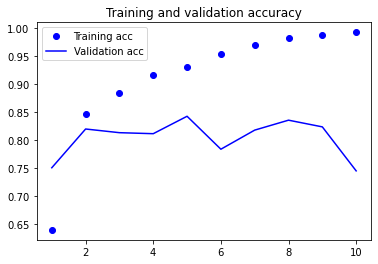

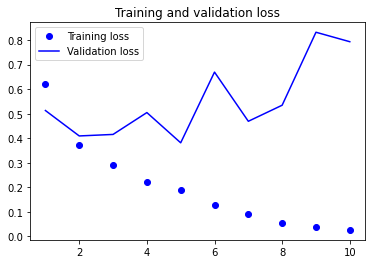

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 3. 양방향 처리
<br><br>
지금까지 논의한 순환 신경망은 주어진 단어와 그 단어 이전에 나온 단어들 사이의 관계를 반영한다. 그런데 그 반대 방향의 관계도 중요하다. 

They wanted to pet the dog whose fur was brown.

이 문장에서 개는 털이 있다는 정보와 그 털이 갈색이라는 정보가 들어있다. 신경망이 fur라는 토큰에 도달했을 때는 dog라는 토큰을 지나친 이후이므로 털과 개를 연관시킬 수 있지만, dog을 만난 당시에는 개에게 갈색 털이 있음을 미리 알지 못한다. 순환 신경망도 이처럼 입력을 거꾸로 훑을 수 있다면 좋을 것이다. 그런 생각에서 만들어진 것이 바로 양방향 순환 신경망이다. 케라스는 Bidirectional이라는 모형을 제공한다. 

양방향 순환 신경망의 기본 개념은 **두 순환층을 병렬로 배치하되, 한 순환층의 뉴런은 입력을 보통의 순서로 받고, 다른 순환층의 뉴런은 같은 입력을 시간의 역순으로 받는다는 것이다. 두 뉴런의 출력을 합한것이 그 입력 토큰에 대한 출력이 된다.** 

In [2]:
num_neurons = 10
maxlen = 100
embedding_dims = 300
model2 = Sequential()
model2.add(Bidirectional(SimpleRNN(num_neurons, return_sequences=True), input_shape=(maxlen, embedding_dims)))
model2.add(Dropout(.2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

# 정리

- NLP모형이 자연어 토큰열을 이해하는 데는 어떤 토큰 앞에 어떤 토큰이 오는지가 중요하다.
- 자연어 문장을 시간 차원을 따라 분할해서 순서 있는 토큰열을 만들면 모형이 문장을 좀 더 깊게 이해하는데 도움이 된다.
- 순환 신경망에는 오차를 시간에 대해(토큰들의 순서에 따라) 역전파함으로써 학습을 진행한다. 
- 순환 신경망을 특히나 깊은 신경망이라서 기울기들이 특히나 일시적이다. 그래서 기울기가 폭발하거나 소멸할 수 있다. 
- 순환 신경망의 가중치들은 한 입력 견본의 모든 토큰에 대한 역전파가 끝난 후에 일괄적으로 갱신된다.
- 한 RNN에 입력 견본의 토큰들을 순방향과 역뱡형으로 동시에 통과시킴으로써 미래와 과거의 토큰들을 모두 고려하는 모형을 만들 수 있다.